In [46]:
# prompt: load my google drive
import pandas as pd
import numpy as np
from datetime import datetime

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
CCSR_categories_path = '/content/drive/MyDrive/Data/Output Data/master_categories.csv'
CCSR_categories = pd.read_csv(CCSR_categories_path)


In [48]:
len(CCSR_categories)

838271

In [49]:
# prompt: drop ICD_CD__TRUNC from CCSR_categories and remove duplicates

CCSR_categories = CCSR_categories.drop(columns=['ICD_CD_TRUNC'])
CCSR_categories = CCSR_categories.drop_duplicates().reset_index(drop=True)
len(CCSR_categories)



770433

I need to remove duplicates from IP_FLAG, OP_FLAG, PROF_FLAG that crept in because of ICD_CD_TRUNC.  I will do this by ordering the data by BENE_ID, YR, CCSR_CATEGORY_DESCRIPTION, descending values of IP_FLAG, OP_FLAG, PROF_FLAG

In [50]:
# prompt: order the CCSR_categories by BENE_ID, YR, CCSR_CATEGORY_DESCRIPTION, descending values of IP_FLAG, descending values of OP_FLAG, and descending values of PROF_FLAG.  If there are duplicates by BENE_ID, YR, CCSR_CATEGORY_DESCRIPTION, keep the first row.

# Order the CCSR_categories by BENE_ID, YR, CCSR_CATEGORY_DESCRIPTION, descending values of IP_FLAG, OP_FLAG, PROF_FLAG
CCSR_categories = CCSR_categories.sort_values(by=['BENE_ID', 'YR', 'CCSR_CATEGORY_DESCRIPTION', 'IP_FLAG', 'OP_FLAG', 'PROF_FLAG'],
                                            ascending=[True, True, True, False, False, False])

# If there are duplicates by BENE_ID, YR, CCSR_CATEGORY_DESCRIPTION, keep the first row
CCSR_categories = CCSR_categories.drop_duplicates(subset=['BENE_ID', 'YR', 'CCSR_CATEGORY_DESCRIPTION'], keep='first').reset_index(drop=True)


In [51]:
len(CCSR_categories)

723776

In [52]:
# prompt: show me unique values of CCSR_CATEGORY_DESCRIPTION

CCSR_categories_distinct = CCSR_categories['CCSR_CATEGORY_DESCRIPTION'].unique()
CCSR_categories_distinct


array(['Aplastic anemia', 'Neonatal cerebral disorders', 'Obesity',
       'Personal history of other disease', 'Prediabetes',
       'Socioeconomic/psychosocial factors',
       'Spondylopathies/spondyloarthropathy (including infective)',
       'Epilepsy; convulsions', 'Lifestyle/life management factors',
       'Nervous system pain and pain syndromes',
       'Chronic rheumatic heart disease',
       'Injury or poisoning and others',
       'External cause codes: other specified, classifiable and NEC; initial encounter',
       'Acute bronchitis', 'Sinusitis', 'Viral infection',
       'Abnormal findings without diagnosis',
       'Coronary atherosclerosis and other heart disease',
       'Essential hypertension',
       'Other specified and unspecified nutritional and metabolic disorders',
       'Other specified and unspecified perinatal conditions',
       'Any dental condition including traumatic injury',
       'Headache; including migraine', 'Other general signs and symptoms',

In [53]:
# prompt: further limit the list to values containing diabetes

diabetes_categories = [category for category in CCSR_categories_distinct if 'diabetes' in category.lower()]
diabetes_categories


['Prediabetes',
 'Diabetes mellitus with complication',
 'Diabetes mellitus without complication']

Definition of diabetes cohort:
Patients with a CCSR_CATEGORY_DESCRIPTION of Diabetes mellitus without complication in 2021 and with continuous eligibility through 2019-2022.  


In [54]:
CCSR_categories

,BENE_ID,YR,CCSR_CATEGORY_DESCRIPTION,OP_FLAG,IP_FLAG,PROF_FLAG
0,-10000010288010,2015,Aplastic anemia,N,N,Y
1,-10000010288010,2015,Neonatal cerebral disorders,N,N,Y
2,-10000010288010,2015,Obesity,N,N,Y
3,-10000010288010,2015,Personal history of other disease,N,N,Y
4,-10000010288010,2015,Prediabetes,N,N,Y
...,...,...,...,...,...,...
723771,-10000010254618,2023,Male infertility,Y,N,N
723772,-10000010254618,2023,"Musculoskeletal pain, not low back pain",Y,N,N
723773,-10000010254618,2023,Other specified and unspecified nutritional an...,Y,N,N
723774,-10000010254618,2023,Sinusitis,Y,N,N


In [55]:
# prompt: Filter master_categories for YR=2021 and CCSR_CATEGORY_DESCRIPTION of Diabetes mellitus without complication. Create a dataframe called diabetes_2021 with distinct values of BENE_ID

diabetes_2021 = CCSR_categories[(CCSR_categories['YR'] == 2021) & (CCSR_categories['CCSR_CATEGORY_DESCRIPTION'] == 'Diabetes mellitus without complication')][['BENE_ID']].drop_duplicates().reset_index(drop=True)
len(diabetes_2021)

1085

In [56]:
# Read enrollment file to add in continuous eligibility for 2019-2022
enrollment_path = '/content/drive/MyDrive/Data/Output Data/MemberYear.csv'
enrollment = pd.read_csv(enrollment_path)
enrollment

,BENE_ID,STATE_CODE,COUNTY_CD,ZIP_CD,BENE_BIRTH_DT,SEX_IDENT_CD,BENE_RACE_CD,ESRD_IND,BENE_DEATH_DT,BENE_ENROLLMT_REF_YR,BENE_BIRTH_YR,AGE_ROUGH_CALC,AGE_GRP
0,-10000010254618,1,1500,36109,1999-08-16,1,1,0,NaN,2019,1999,20,ADULT BELOW 65
1,-10000010254647,1,1410,35756,1990-08-14,1,2,0,NaN,2019,1990,29,ADULT BELOW 65
2,-10000010254653,1,1400,36801,1982-03-18,2,1,0,NaN,2019,1982,37,ADULT BELOW 65
3,-10000010254656,1,1360,35216,1999-07-24,2,1,0,NaN,2019,1999,20,ADULT BELOW 65
4,-10000010254666,1,1440,35805,2009-02-23,2,4,0,NaN,2019,2009,10,CHILD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41374,-10000010288006,5,5330,95459,1942-09-14,1,1,0,NaN,2023,1942,81,ADULT 65+
41375,-10000010288007,5,5060,94598,1962-09-11,2,1,Y,NaN,2023,1962,61,ADULT BELOW 65
41376,-10000010288008,5,5430,92282,1945-12-26,1,5,0,NaN,2023,1945,78,ADULT 65+
41377,-10000010288009,5,5600,95380,1957-09-24,1,1,0,NaN,2023,1957,66,ADULT 65+


In [57]:
# prompt: create a dataframe called enrollment_diabetes by filtering enrollment to BENE_IDs in diabetes_2021

enrollment_diabetes = enrollment[enrollment['BENE_ID'].isin(diabetes_2021['BENE_ID'])]
enrollment_diabetes


,BENE_ID,STATE_CODE,COUNTY_CD,ZIP_CD,BENE_BIRTH_DT,SEX_IDENT_CD,BENE_RACE_CD,ESRD_IND,BENE_DEATH_DT,BENE_ENROLLMT_REF_YR,BENE_BIRTH_YR,AGE_ROUGH_CALC,AGE_GRP
0,-10000010254618,1,1500,36109,1999-08-16,1,1,0,NaN,2019,1999,20,ADULT BELOW 65
14,-10000010254721,1,1440,35758,1944-11-08,2,3,0,NaN,2019,1944,75,ADULT 65+
16,-10000010254731,1,1420,36785,1947-12-12,1,2,0,NaN,2019,1947,72,ADULT 65+
19,-10000010254740,1,1010,36530,1949-08-29,2,1,0,NaN,2019,1949,70,ADULT 65+
25,-10000010254776,1,1300,0,1953-11-09,1,1,0,NaN,2019,1953,66,ADULT 65+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41358,-10000010287946,5,5440,95843,1956-01-05,2,4,Y,NaN,2023,1956,67,ADULT 65+
41359,-10000010287949,5,5200,90280,1950-11-21,1,5,0,NaN,2023,1950,73,ADULT 65+
41360,-10000010287953,5,5480,94114,1964-02-22,1,5,0,NaN,2023,1964,59,ADULT BELOW 65
41364,-10000010287978,5,5140,93307,1953-06-08,1,5,0,NaN,2023,1953,70,ADULT 65+


In [58]:
# prompt: create a count of BENE_ID by BENE_ENROLLMT_REF_YR

# Count of BENE_ID by BENE_ENROLLMT_REF_YR
enrollment_count = enrollment_diabetes.groupby('BENE_ENROLLMT_REF_YR')['BENE_ID'].count()
enrollment_count


,BENE_ID
BENE_ENROLLMT_REF_YR,
2019,1000
2020,1038
2021,1085
2022,1085
2023,1085


In order to apply the continuous eligibility requirement, I will be limiting my intial cohort of 1085 to 1000 (these were continously eligible from 2019 onward)


In [59]:
# prompt: create a dataframe of unique BENE_IDs from enrollment_diabetes where min of BENE_ENROLLMT_REF_YR=2019

# Find the minimum BENE_ENROLLMT_REF_YR for each BENE_ID
min_enrollment_year = enrollment_diabetes.groupby('BENE_ID')['BENE_ENROLLMT_REF_YR'].min()

# Filter for BENE_IDs where the minimum enrollment year is 2019
bene_ids_2019 = min_enrollment_year[min_enrollment_year == 2019].index

# Create a DataFrame of unique BENE_IDs
diabetes_cohort_final = pd.DataFrame({'BENE_ID': bene_ids_2019})




In [60]:
bene_ids_2019

Index([-10000010287992, -10000010287978, -10000010287953, -10000010287949,
       -10000010287946, -10000010287893, -10000010287882, -10000010287790,
       -10000010287770, -10000010287695,
       ...
       -10000010255070, -10000010254936, -10000010254924, -10000010254919,
       -10000010254860, -10000010254776, -10000010254740, -10000010254731,
       -10000010254721, -10000010254618],
      dtype='int64', name='BENE_ID', length=1000)

We will create patient journeys for the cohort using CCSR_categories

In [61]:
# prompt: filter CCSR_categories for BENE_IDS in diabetes_cohort_final and YR equal to or greater than 2019.  also reset index

# Filter CCSR_categories for BENE_IDs in diabetes_cohort_final and YR >= 2019
CCSR_cohort = CCSR_categories[
    (CCSR_categories['BENE_ID'].isin(diabetes_cohort_final['BENE_ID'])) &
    (CCSR_categories['YR'] >= 2019)
]

# Reset the index
CCSR_cohort = CCSR_cohort.reset_index(drop=True)


In [62]:
CCSR_cohort['YR'].value_counts()

,count
YR,
2021,18607
2022,17040
2020,16888
2019,16036
2023,8381


In [63]:
CCSR_cohort

,BENE_ID,YR,CCSR_CATEGORY_DESCRIPTION,OP_FLAG,IP_FLAG,PROF_FLAG
0,-10000010287992,2019,Abnormal findings without diagnosis,Y,N,Y
1,-10000010287992,2019,Aplastic anemia,Y,N,N
2,-10000010287992,2019,Coronary atherosclerosis and other heart disease,Y,N,Y
3,-10000010287992,2019,Diabetes mellitus without complication,Y,N,Y
4,-10000010287992,2019,Disorders of lipid metabolism,Y,N,Y
...,...,...,...,...,...,...
76947,-10000010254618,2023,Male infertility,Y,N,N
76948,-10000010254618,2023,"Musculoskeletal pain, not low back pain",Y,N,N
76949,-10000010254618,2023,Other specified and unspecified nutritional an...,Y,N,N
76950,-10000010254618,2023,Sinusitis,Y,N,N


For clearer patient journeys, I will do the following:
1.  Include only the top diagnosis
2.  Create a month column
3.  If the synthetic data does not have intelligent patient journeys, I will build some intelligence with the help of a few logical rules

In [64]:
# prompt: show me frequency counts of top 25 values of CCSR_CATEGORY_DESCRIPTION

# Display frequency counts of the top 25 CCSR categories
top_categories = CCSR_cohort['CCSR_CATEGORY_DESCRIPTION'].value_counts().nlargest(25)
top_categories


,count
CCSR_CATEGORY_DESCRIPTION,
Socioeconomic/psychosocial factors,4241
Disorders of lipid metabolism,4239
Other specified and unspecified nutritional and metabolic disorders,4191
Diabetes mellitus without complication,4176
Lifestyle/life management factors,3715
Abnormal findings without diagnosis,3634
Prediabetes,3373
Diabetes mellitus with complication,3258
Obesity,3239


In [65]:
# prompt: remove CCSR_CATEGORY_DESCRIPTION of 'External cause codes: other specified, classifiable and NEC; initial encounter' and 'Abnormal findings without diagnosis' from top_categories
top_categories = top_categories.drop(index=['External cause codes: other specified, classifiable and NEC; initial encounter', 'Abnormal findings without diagnosis'], errors='ignore')
len(top_categories)

23

In [66]:
# prompt: filter CCSR_cohort for CCSR_CATEGORY_DESCRIPTION values in top_categories

# Filter CCSR_cohort for CCSR_CATEGORY_DESCRIPTION values in top_categories
CCSR_cohort_filtered = CCSR_cohort[CCSR_cohort['CCSR_CATEGORY_DESCRIPTION'].isin(top_categories.index)]

# Reset the index of the filtered DataFrame
CCSR_cohort_filtered = CCSR_cohort_filtered.reset_index(drop=True)

CCSR_cohort_filtered


,BENE_ID,YR,CCSR_CATEGORY_DESCRIPTION,OP_FLAG,IP_FLAG,PROF_FLAG
0,-10000010287992,2019,Aplastic anemia,Y,N,N
1,-10000010287992,2019,Coronary atherosclerosis and other heart disease,Y,N,Y
2,-10000010287992,2019,Diabetes mellitus without complication,Y,N,Y
3,-10000010287992,2019,Disorders of lipid metabolism,Y,N,Y
4,-10000010287992,2019,Essential hypertension,Y,N,N
...,...,...,...,...,...,...
56870,-10000010254618,2023,Essential hypertension,Y,N,N
56871,-10000010254618,2023,"Musculoskeletal pain, not low back pain",Y,N,N
56872,-10000010254618,2023,Other specified and unspecified nutritional an...,Y,N,N
56873,-10000010254618,2023,Sinusitis,Y,N,N


In [67]:
# prompt: show me frequency counts of CCSR_CATEGORY_DESCRIPTION for the following values 'Prediabetes',
#  'Diabetes mellitus with complication',
#  'Diabetes mellitus without complication'] by YR

# Filter for the specified CCSR_CATEGORY_DESCRIPTION values
categories_of_interest = ['Prediabetes', 'Diabetes mellitus with complication', 'Diabetes mellitus without complication']
filtered_df = CCSR_cohort_filtered[CCSR_cohort_filtered['CCSR_CATEGORY_DESCRIPTION'].isin(categories_of_interest)]

# Group by 'YR' and 'CCSR_CATEGORY_DESCRIPTION' and count the occurrences
frequency_counts = filtered_df.groupby(['YR', 'CCSR_CATEGORY_DESCRIPTION'])['BENE_ID'].count().reset_index(name='Count')

# Display the frequency counts
frequency_counts


,YR,CCSR_CATEGORY_DESCRIPTION,Count
0,2019,Diabetes mellitus with complication,676
1,2019,Diabetes mellitus without complication,882
2,2019,Prediabetes,716
3,2020,Diabetes mellitus with complication,705
4,2020,Diabetes mellitus without complication,911
5,2020,Prediabetes,730
6,2021,Diabetes mellitus with complication,739
7,2021,Diabetes mellitus without complication,1000
8,2021,Prediabetes,835
9,2022,Diabetes mellitus with complication,733


I will need to build some intelligence into the patient journeys.  

In [68]:
# Filter out rows where YR is in (2019, 2020, 2021) and CCSR_CATEGORY_DESCRIPTION is 'Diabetes mellitus with complication'
CCSR_cohort_filtered = CCSR_cohort_filtered[~((CCSR_cohort_filtered['YR'].isin([2019, 2020, 2021])) & (CCSR_cohort_filtered['CCSR_CATEGORY_DESCRIPTION'] == 'Diabetes mellitus with complication'))]

# Filter out rows if YR = 2019 and CCSR_CATEGORY_DESCRIPTION = Diabetes mellitus without complication
CCSR_cohort_filtered = CCSR_cohort_filtered[~((CCSR_cohort_filtered['YR'].isin([2019])) & (CCSR_cohort_filtered['CCSR_CATEGORY_DESCRIPTION'] == 'Diabetes mellitus without complication'))]

# Cannot have Prediabetes in 2021 or after
CCSR_cohort_filtered = CCSR_cohort_filtered[~((CCSR_cohort_filtered['YR'].isin([2021,2022,2023])) & (CCSR_cohort_filtered['CCSR_CATEGORY_DESCRIPTION'] == 'Prediabetes'))]

# Reset the index of the filtered DataFrame
CCSR_cohort_filtered = CCSR_cohort_filtered.reset_index(drop=True)



In [69]:
# prompt: add a column, MONTH, to CCSR_cohort_filtered, with randomly selected values from 1 to 12.  Ensure that everytime I run the code, I get the same values for MONTH

import numpy as np
# Set a seed for reproducibility
np.random.seed(42)

# Generate random month values for each row in the DataFrame
random_months = np.random.randint(1, 13, size=len(CCSR_cohort_filtered))

# Add the 'MONTH' column to the DataFrame
CCSR_cohort_filtered['MONTH'] = random_months
CCSR_cohort_filtered


,BENE_ID,YR,CCSR_CATEGORY_DESCRIPTION,OP_FLAG,IP_FLAG,PROF_FLAG,MONTH
0,-10000010287992,2019,Aplastic anemia,Y,N,N,7
1,-10000010287992,2019,Coronary atherosclerosis and other heart disease,Y,N,Y,4
2,-10000010287992,2019,Disorders of lipid metabolism,Y,N,Y,11
3,-10000010287992,2019,Essential hypertension,Y,N,N,8
4,-10000010287992,2019,Obesity,Y,N,N,5
...,...,...,...,...,...,...,...
51941,-10000010254618,2023,Essential hypertension,Y,N,N,1
51942,-10000010254618,2023,"Musculoskeletal pain, not low back pain",Y,N,N,11
51943,-10000010254618,2023,Other specified and unspecified nutritional an...,Y,N,N,8
51944,-10000010254618,2023,Sinusitis,Y,N,N,4


In [70]:
filtered_df = CCSR_cohort_filtered[CCSR_cohort_filtered['CCSR_CATEGORY_DESCRIPTION'].isin(categories_of_interest)]
# Group by 'YR' and 'CCSR_CATEGORY_DESCRIPTION' and count the occurrences
frequency_counts = filtered_df.groupby(['YR', 'CCSR_CATEGORY_DESCRIPTION'])['BENE_ID'].count().reset_index(name='Count')
# Display the frequency counts
frequency_counts


,YR,CCSR_CATEGORY_DESCRIPTION,Count
0,2019,Prediabetes,716
1,2020,Diabetes mellitus without complication,911
2,2020,Prediabetes,730
3,2021,Diabetes mellitus without complication,1000
4,2022,Diabetes mellitus with complication,733
5,2022,Diabetes mellitus without complication,925
6,2023,Diabetes mellitus with complication,405
7,2023,Diabetes mellitus without complication,458


In [71]:
# Group by 'YR' and 'CCSR_CATEGORY_DESCRIPTION' and count the occurrences
frequency_counts = CCSR_cohort_filtered.groupby(['YR', 'CCSR_CATEGORY_DESCRIPTION'])['BENE_ID'].count().reset_index(name='Count')

# Display the frequency counts
frequency_counts

,YR,CCSR_CATEGORY_DESCRIPTION,Count
0,2019,Acute myocardial infarction,187
1,2019,Aplastic anemia,674
2,2019,Chronic kidney disease,288
3,2019,Coronary atherosclerosis and other heart disease,648
4,2019,Disorders of lipid metabolism,903
...,...,...,...
103,2023,Other specified and unspecified perinatal cond...,237
104,2023,Proteinuria,250
105,2023,Sinusitis,159
106,2023,Socioeconomic/psychosocial factors,464


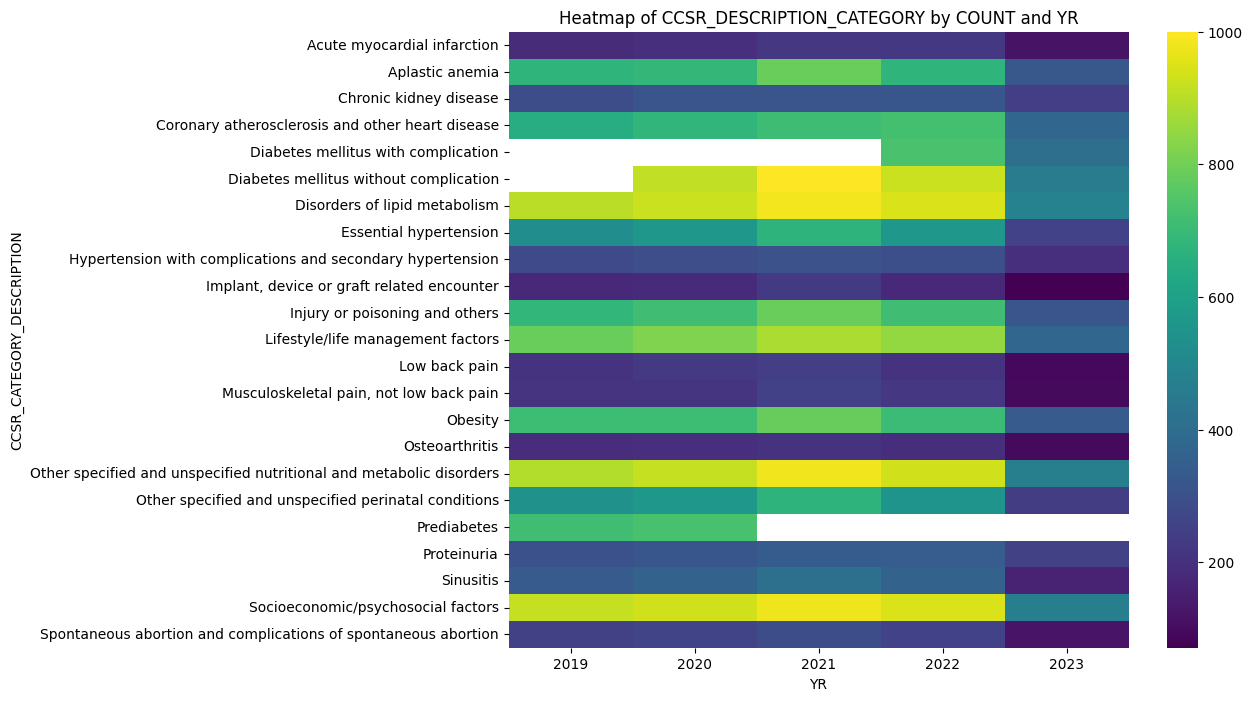

In [72]:
# prompt: Using frequency_counts, create a heatmap of CCSR_DESCRIPTION_CATEGORY by COUNT and YR.  CCSR_DESCRIPTION_CATEGORY should be on the Y axis

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'frequency_counts' DataFrame is already created as in the provided code

# Pivot the DataFrame for heatmap creation
heatmap_data = frequency_counts.pivot(index='CCSR_CATEGORY_DESCRIPTION', columns='YR', values='Count')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('Heatmap of CCSR_DESCRIPTION_CATEGORY by COUNT and YR')
plt.show()
